# Customer churn prediction

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/MSBY28IJ47U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/Public/lmaaya/data/DeepLearning/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3241,3148-BLQJT,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.10,20.1,Yes
957,8388-FYNPZ,Male,0,No,No,4,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,56.75,245.15,No
5495,2696-NARTR,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,73.85,926.25,Yes
3305,5144-TVGLP,Male,1,No,No,38,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.75,3653,No
4813,8631-WUXGY,Female,0,No,Yes,46,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,4391.25,No


In [4]:
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# convert string total charges to numeric

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

# print rows with NA totals

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* drop rows with missing values because they are few

In [8]:
df1  = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* now convert to numeric

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\PC\AppData\Local\Temp\ipykernel_17896\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Visualization

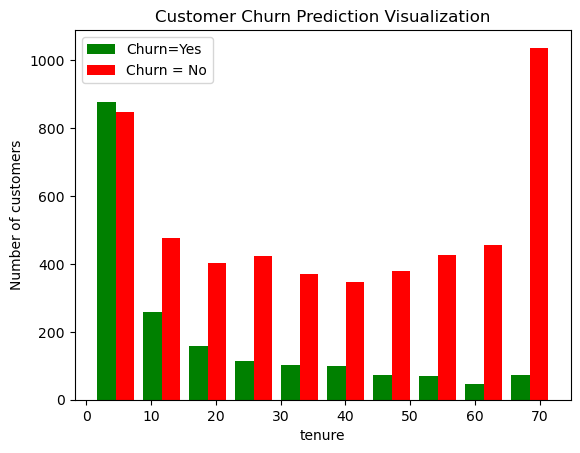

In [12]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure


plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()

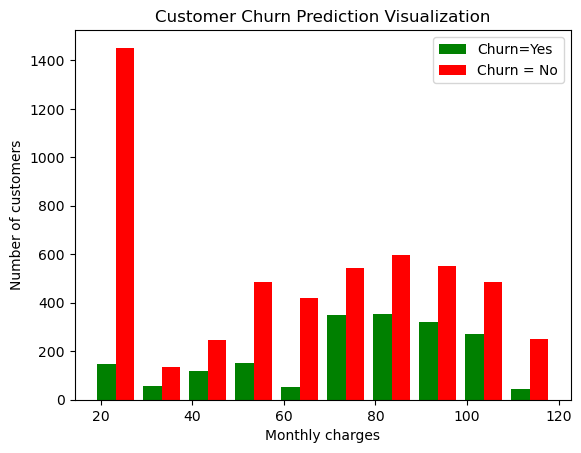

In [13]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges


plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()

# print unique values for all your categorical variables

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == "object": # limit to categorical variiables
            print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


# replace/recode factor levels

In [16]:
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17896\1492013314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_17896\1492013314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [17]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# convert Yes/No to 0/1

In [18]:
yes_no_columns = ['Partner', "Dependents", "PhoneService", 'MultipleLines', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No': 0}, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17896\1865279045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No': 0}, inplace=True)


In [19]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17896\1975432841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)


In [22]:
df1['gender'].unique()

array([1, 0], dtype=int64)

# one hot encoding for those with 3 levels

In [23]:
df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3789,0,0,0,0,9,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4077,1,1,1,1,14,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2273,0,0,1,0,30,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# scaling variables

In [26]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4633,1,0,1,1,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4468,1,0,0,0,0.197183,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
907,0,0,0,0,0.253521,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [28]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Machine learning
## Train, test

In [93]:
X = df2.drop('Churn', axis = 'columns')
Y = df2['Churn']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [69]:
X_train.shape

(5625, 26)

In [70]:
X_test.shape

(1407, 26)

In [71]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [72]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26, ), activation = 'relu'),
    keras.layers.Dense(1,  activation = 'sigmoid')

])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4718 - accuracy: 0.7708
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7886
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7948
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.7991
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8027
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8030
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accura

In [73]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7946


[0.44935017824172974, 0.7945984601974487]

In [74]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.2021668 ],
       [0.46980298],
       [0.03044744],
       [0.74294513],
       [0.5189498 ]], dtype=float32)

In [75]:
## Convert predicted churns to 0/1

In [76]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            

In [77]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [78]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

# Classification report

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       999
           1       0.66      0.61      0.63       408

    accuracy                           0.79      1407
   macro avg       0.75      0.74      0.75      1407
weighted avg       0.79      0.79      0.79      1407



# confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

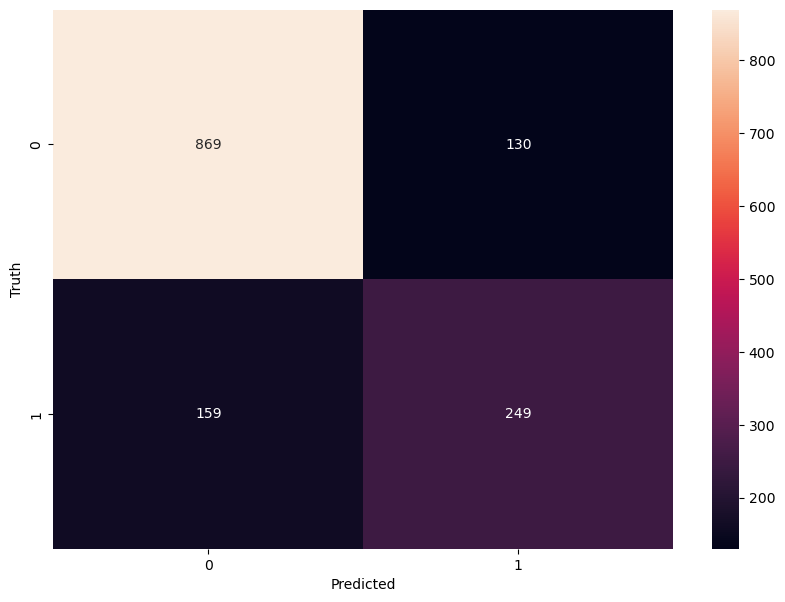

In [80]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## accuracy

In [81]:
round((873+233)/(873+233+126+175), 2)

0.79

# precision for each of the classes

In [82]:
round(873/(873+175), 2)

0.83

In [83]:
round(233/(233+126), 2)

0.65

# recall: Sensitivity(?)

In [84]:
round(873/(873+126), 2)

0.87

In [85]:
round(233/(233+175), 2)

0.57

In [152]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/JnlM4yLFNuo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# Build a model (ANN) in tensorflow/keras

In [86]:
# pip install tensorflow_addons

from tensorflow_addons import losses

In [87]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [90]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

y_preds = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7122
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accura

# Improve the f1-score
## Method 1. Undersampling

In [95]:
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [96]:
count_class_0, count_class_1

(5163, 1869)

In [97]:
df_class_0.shape

(5163, 27)

In [98]:
df_class_1.shape

(1869, 27)

In [100]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

# concate the two data frames

In [101]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)


print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [104]:
X = df_test_under.drop('Churn', axis = 'columns')
Y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [105]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [106]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

y_preds = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6247 - accuracy: 0.6793
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7746
Epoch 11/

## Method 2: Oversampling

In [108]:
count_class_0, count_class_1

(5163, 1869)

In [112]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)


df_class_1_over.shape

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


print('Random over-sampling')
print(df_test_over.Churn.value_counts())

Random over-sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [115]:
X = df_test_over.drop('Churn', axis = 'columns')
Y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [116]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

y_preds = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7188
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7691
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7740
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.7705
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7725
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7741
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7764
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7769
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7777
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4617 - accura

## Method 3: SMOTE

In [119]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [120]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [127]:
y_preds = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7381
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7730
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7787
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7815
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7844
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7875
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.7893
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7960
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7962
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4362 - accura

## Method 4: Use of Ensemble with undersampling

In [128]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [130]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [133]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [134]:
4130/1495

2.762541806020067

## from above ratio, it is quite clear that the 0-th class is roughly about 3 three times the 1-th class
## so we may need to split majority group into 3 classes

In [136]:
4130/3

1376.6666666666667

In [137]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [138]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

# creating ensemble samples

In [139]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [142]:

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
    
    X_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train['Churn']
    return X_train, y_train


In [144]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_preds1 = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6538 - accuracy: 0.6512
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7505
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7763
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7742
Epoch 11/

In [145]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_preds2 = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5965 - accuracy: 0.6853
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7545
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7696
Epoch 11/

In [146]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_preds3 = ANN(X_train,  y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6091 - accuracy: 0.6751
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7586
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7647
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7712
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7814
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7727
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7841
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7799
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7818
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7879
Epoch 11/

In [148]:
vote1 = 0
vote2 = 1
vote3 = 1

vote1 + vote2+vote3

2

In [149]:
len(y_preds1)

1407

In [150]:
y_pred_final = y_preds1.copy()

for i in range(len(y_preds1)):
    n_ones = y_preds1[i] + y_preds2[i] + y_preds3[i]
    
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [151]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

